In [257]:
import numpy as np
import pandas as pd
import random

df = pd.read_csv("Sprint 1 - Movies Data Set Analysis/movies.csv")  # Gathering data
df = df.drop(columns=["Summary"])  # remove the column "Summary"
df.columns = df.columns.str.lower().str.replace(
    " ", "_"
)  # Make all the column names lowercase and replace spaces with underscores
df.drop(
    df.tail(1).index, inplace=True
)  # Remove the last row of the DF (containing NaNs)

In [258]:
display(df.tail(5))  # See the first five rows of the Data Frame

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
610,611,Godzilla: King of the Monsters,PG-13,200000000.0,3.859000e+08,2019-05-13,Adventure,132.0,NaN,NaN
611,612,Toy Story 4,G,200000000.0,1.062000e+09,2019-06-11,Animation,100.0,NaN,NaN
612,613,Fast & Furious Presents: Hobbs & Shaw,PG-13,200000000.0,7.594000e+08,2019-07-13,Thriller,136.0,NaN,NaN
613,614,The Lion King,PG,250000000.0,1.632000e+09,2019-07-09,Drama,118.0,NaN,NaN
614,615,Avengers: Endgame,PG-13,356000000.0,2.796000e+09,2019-04-22,Action,181.0,NaN,NaN


In [259]:
# Fill NaNs with a random value between (mean — 2 * std) & (mean + 2 * std)


def nan_rand_fill(data, key):
    mn = data[key].mean()
    sd = data[key].std()
    low_l = mn - 2 * sd
    high_l = mn + 2 * sd
    nans = data[key].isna()
    df.loc[nans, key] = [
        abs(np.floor(random.uniform(low_l, high_l)))
        if "count" in key
        else abs(round(random.uniform(low_l, high_l), 1))
        for i in range(nans.sum())
    ]


nan_rand_fill(df, "rating")
nan_rand_fill(df, "rating_count")

In [260]:
df = df.drop(df[df['title'] == 'The Blair Witch Project'].index)

In [261]:
# Fill NaNs with a median value
# df["rating"].fillna(value=df["rating"].median(), inplace=True)

In [262]:
display(df.tail(5))  # See the first five rows of the Data Frame

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
610,611,Godzilla: King of the Monsters,PG-13,200000000.0,3.859000e+08,2019-05-13,Adventure,132.0,5.3,915790.0
611,612,Toy Story 4,G,200000000.0,1.062000e+09,2019-06-11,Animation,100.0,5.7,751229.0
612,613,Fast & Furious Presents: Hobbs & Shaw,PG-13,200000000.0,7.594000e+08,2019-07-13,Thriller,136.0,8.5,468025.0
613,614,The Lion King,PG,250000000.0,1.632000e+09,2019-07-09,Drama,118.0,8.2,98319.0
614,615,Avengers: Endgame,PG-13,356000000.0,2.796000e+09,2019-04-22,Action,181.0,8.2,800788.0


In [263]:
print(df.shape)  # Shape of the Data Frame

(614, 10)


In [264]:
print(df.dtypes)  # Column names with their data types

movieid           int64
title            object
mpaa_rating      object
budget          float64
gross           float64
release_date     object
genre            object
runtime         float64
rating          float64
rating_count    float64
dtype: object


In [265]:
print(df.columns)  # Column names

Index(['movieid', 'title', 'mpaa_rating', 'budget', 'gross', 'release_date',
       'genre', 'runtime', 'rating', 'rating_count'],
      dtype='object')


In [266]:
print(df.isna().sum())  # Column names with their NaN count

movieid         0
title           0
mpaa_rating     0
budget          0
gross           0
release_date    0
genre           0
runtime         0
rating          0
rating_count    0
dtype: int64


In [267]:
df.drop_duplicates(
    subset=["title", "release_date"]
)  # Remove row duplicates by title and release date

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
0,1,Look Who's Talking,PG-13,7500000.0,2.960000e+08,1989-10-12,Romance,93.0,5.9,73638.0
1,2,Driving Miss Daisy,PG,7500000.0,1.457933e+08,1989-12-13,Comedy,99.0,7.4,91075.0
2,3,Turner & Hooch,PG,13000000.0,7.107992e+07,1989-07-28,Crime,100.0,7.2,91415.0
3,4,Born on the Fourth of July,R,14000000.0,1.610017e+08,1989-12-20,War,145.0,7.2,91415.0
4,5,Field of Dreams,PG,15000000.0,8.443162e+07,1989-04-21,Drama,107.0,7.5,101702.0
...,...,...,...,...,...,...,...,...,...,...
610,611,Godzilla: King of the Monsters,PG-13,200000000.0,3.859000e+08,2019-05-13,Adventure,132.0,5.3,915790.0
611,612,Toy Story 4,G,200000000.0,1.062000e+09,2019-06-11,Animation,100.0,5.7,751229.0
612,613,Fast & Furious Presents: Hobbs & Shaw,PG-13,200000000.0,7.594000e+08,2019-07-13,Thriller,136.0,8.5,468025.0
613,614,The Lion King,PG,250000000.0,1.632000e+09,2019-07-09,Drama,118.0,8.2,98319.0


In [268]:
df.drop(['movieid'], axis=1, inplace=True) # Drop Movie ID column

In [269]:
# Convert data types (Converted float64 to int64 so the high gross and budget values won't overflow the int)

df["budget"] = df["budget"].astype(np.int64)
df["gross"] = df["gross"].astype(np.int64, errors="raise")
df["release_date"] = pd.to_datetime(df["release_date"])

In [270]:
print(df.dtypes)

title                   object
mpaa_rating             object
budget                   int64
gross                    int64
release_date    datetime64[ns]
genre                   object
runtime                float64
rating                 float64
rating_count           float64
dtype: object


In [271]:
df.tail(10)

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
605,Pokemon Detective Pikachu,PG,150000000,431600000,2019-05-03,Mystery,104.0,7.0,279345.0
606,Spider-Man: Far from Home,PG-13,160000000,1131000000,2019-06-26,Action,129.0,6.4,28902.0
607,Dumbo,PG,170000000,353000000,2019-03-11,Adventure,112.0,7.0,239704.0
608,Captain Marvel,PG-13,175000000,1128000000,2019-02-27,Action,124.0,6.2,76139.0
609,Aladdin,PG,183000000,1049000000,2019-05-08,Fantasy,128.0,6.0,324240.0
610,Godzilla: King of the Monsters,PG-13,200000000,385900000,2019-05-13,Adventure,132.0,5.3,915790.0
611,Toy Story 4,G,200000000,1062000000,2019-06-11,Animation,100.0,5.7,751229.0
612,Fast & Furious Presents: Hobbs & Shaw,PG-13,200000000,759400000,2019-07-13,Thriller,136.0,8.5,468025.0
613,The Lion King,PG,250000000,1632000000,2019-07-09,Drama,118.0,8.2,98319.0
614,Avengers: Endgame,PG-13,356000000,2796000000,2019-04-22,Action,181.0,8.2,800788.0


In [272]:
# Show the movies with more than 7 in Rating & greater than 50 million Gross
display(df[(df["rating"] > 7) & (df["gross"] > 50000000)])

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
1,Driving Miss Daisy,PG,7500000,145793296,1989-12-13,Comedy,99.0,7.4,91075.0
2,Turner & Hooch,PG,13000000,71079915,1989-07-28,Crime,100.0,7.2,91415.0
3,Born on the Fourth of July,R,14000000,161001698,1989-12-20,War,145.0,7.2,91415.0
4,Field of Dreams,PG,15000000,84431625,1989-04-21,Drama,107.0,7.5,101702.0
6,When Harry Met Sally...,R,16000000,92800000,1989-07-21,Romance,96.0,7.6,180871.0
...,...,...,...,...,...,...,...,...,...
600,The Secret Life of Pets 2,PG,80000000,429400000,2019-05-24,Animation,86.0,7.5,135942.0
603,Shazam!,PG-13,100000000,365000000,2019-03-15,Action,132.0,7.5,630090.0
612,Fast & Furious Presents: Hobbs & Shaw,PG-13,200000000,759400000,2019-07-13,Thriller,136.0,8.5,468025.0
613,The Lion King,PG,250000000,1632000000,2019-07-09,Drama,118.0,8.2,98319.0


In [273]:
# Show the movies with more than 7 in Rating & greater than 50 million Gross & with Parental guidance as MPAA Rating
display(df[(df["rating"] > 7) & (df["gross"] > 50000000) & (df["mpaa_rating"] == "PG")])

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
1,Driving Miss Daisy,PG,7500000,145793296,1989-12-13,Comedy,99.0,7.4,91075.0
2,Turner & Hooch,PG,13000000,71079915,1989-07-28,Crime,100.0,7.2,91415.0
4,Field of Dreams,PG,15000000,84431625,1989-04-21,Drama,107.0,7.5,101702.0
7,Dead Poets Society,PG,16400000,235860116,1989-06-02,Drama,129.0,8.1,382002.0
13,Batman,PG,35000000,411348924,1989-06-23,Action,126.0,7.5,319517.0
...,...,...,...,...,...,...,...,...,...
565,Beauty and the Beast,PG,160000000,1262886337,2017-03-16,Drama,129.0,7.6,783067.0
581,Spider-Man: Into the Spider-Verse,PG,90000000,375500000,2018-12-01,Animation,117.0,8.2,31937.0
591,Incredibles 2,PG,200000000,1242000000,2018-06-05,Animation,118.0,8.2,45385.0
600,The Secret Life of Pets 2,PG,80000000,429400000,2019-05-24,Animation,86.0,7.5,135942.0


In [274]:
# Count of Animation movies with more than 7 in Rating (use the shape() function)
print(df[(df["genre"] == "Animation") & (df["rating"] > 7)].shape[0])

48


In [275]:
# Show the list of top 5 movies based on Budget
display(df.sort_values("budget", ascending=False).head(5))

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
594,Avengers: Infinity War,PG-13,400000000,2048000000,2018-04-23,Action,149.0,7.5,716428.0
454,Pirates of the Caribbean: On Stranger Tides,PG-13,380000000,1045713802,2011-05-14,Action,136.0,6.6,455211.0
614,Avengers: Endgame,PG-13,356000000,2796000000,2019-04-22,Action,181.0,8.2,800788.0
574,Star Wars: The Last Jedi,PG-13,317000000,1333000000,2019-12-09,Science Fiction,152.0,5.9,193020.0
573,Justice League,PG-13,300000000,657900000,2017-11-15,Action,120.0,7.5,926548.0


In [276]:
# Show the top 5 Comedy movies by Rating
display(df[df["genre"] == "Comedy"].sort_values("rating", ascending=False).head(5))

,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
111,Forrest Gump,PG-13,55000000,677945399,1994-07-06,Comedy,142.0,8.8,1657851.0
537,Deadpool,R,58000000,783112979,2016-02-09,Comedy,108.0,8.5,675470.0
185,The Truman Show,PG,60000000,264118201,1998-06-04,Comedy,103.0,8.1,859224.0
80,Groundhog Day,PG,14600000,70906973,1993-02-11,Comedy,101.0,8.0,549538.0
254,"Monsters, Inc.",G,115000000,562816256,2001-11-01,Comedy,92.0,8.0,758349.0


In [277]:
# Top 5 movie names by Rating
print(df.loc[df.sort_values("rating", ascending=False).head(5).index, "title"])

393                                  The Dark Knight
98                                 Jurassic Park III
99                                      Pulp Fiction
83                                  Schindler's List
287    The Lord of the Rings: The Return of the King
Name: title, dtype: object


In [278]:
# Top 3 high Gross Romance movies released after 1999, not included (typecast it to datetime)
print(
    df.loc[
        df[
            (df["genre"] == "Romance")
            & (df["release_date"] > pd.Timestamp("1999-12-31"))
        ]
        .sort_values("gross", ascending=False)
        .head(3)
        .index,
        "title",
    ]
)

464    The Twilight Saga: Breaking Dawn - Part 2
442    The Twilight Saga: Breaking Dawn - Part 1
401                  The Twilight Saga: New Moon
Name: title, dtype: object


In [279]:
# How many Genres are present in the dataframe? (use the function value_counts() which applies to Series, not Dataframe)
print(df["genre"].value_counts())

Action             110
Comedy              99
Animation           87
Drama               66
Thriller            41
Science Fiction     37
Adventure           30
Family              29
Romance             28
Fantasy             27
Crime               17
Horror              13
Mystery             11
War                  9
Western              6
History              4
Name: genre, dtype: int64


In [280]:
# Top 5 expensive movies released after 1999, not included (measured by Budget)
print(
    df.loc[
        df[df["release_date"] > pd.Timestamp("1999-12-31")]
        .sort_values("budget", ascending=False)
        .head(5)
        .index,
        "title"
    ]
)

594                         Avengers: Infinity War
454    Pirates of the Caribbean: On Stranger Tides
614                              Avengers: Endgame
574                       Star Wars: The Last Jedi
573                                 Justice League
Name: title, dtype: object


In [281]:
# Most & least frequent MPAA Rating in the dataset in terms of occurrences
# print(df['mpaa_rating'].value_counts())
print(
    f"The most frequent MPAA Rating is {df['mpaa_rating'].value_counts().index[0]}")
print(f"The most frequent MPAA Rating is {df['mpaa_rating'].mode()[0]}")
print(
    f"The least frequent MPAA Rating is {df['mpaa_rating'].value_counts().index[-1]}")

The most frequent MPAA Rating is PG-13
The most frequent MPAA Rating is PG-13
The least frequent MPAA Rating is G


In [282]:
# Most and least expensive Genre (take an average of all Budget measures grouped by Genre - use groupBy() method)
print(
    f"Most expensive genre is {df.groupby('genre')['budget'].mean().sort_values(ascending=False).index[0]}"
)
print(
    f"Least expensiv genre is {df.groupby('genre')['budget'].mean().sort_values(ascending=False).index[-1]}"
)

Most expensive genre is Fantasy
Least expensiv genre is Horror


In [283]:
# Which Genre is favored the most by the people?
# print(df.groupby('genre')['rating'].mean().sort_values(ascending=False))
print(
    f"The most favored genre is {df.groupby('genre')['gross'].mean().sort_values(ascending=False).index[0]}"
)

The most favored genre is Fantasy


Text(0.5, 0, 'Genres')

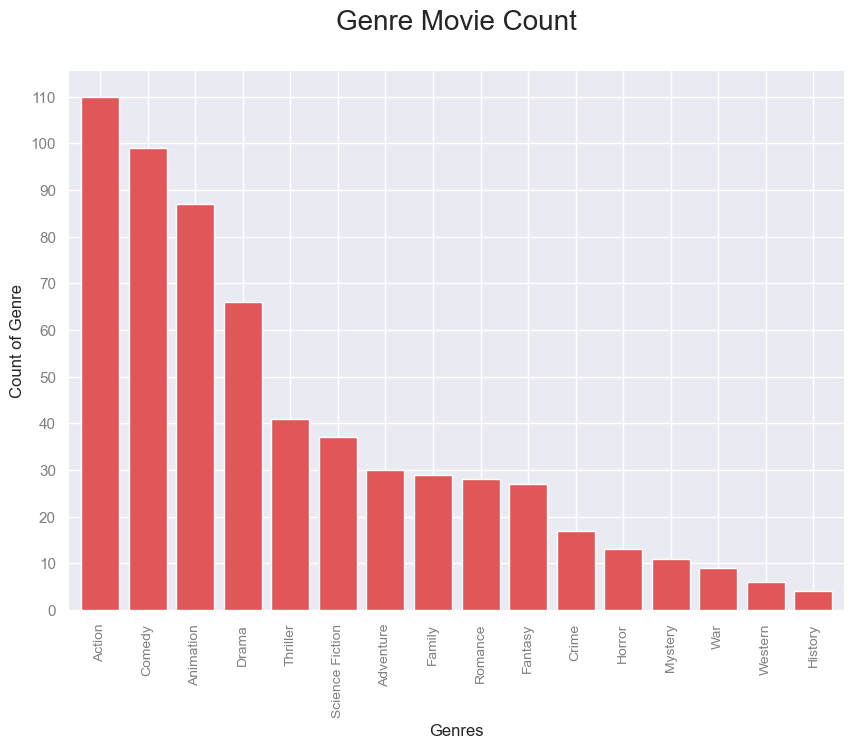

In [284]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Plot 1. Bar Chart - Genre Movie Count

ax = (
    df.groupby("genre")["genre"]
    .count()
    .sort_values(ascending=False)
    .plot(kind="bar", color="#E15759", width=0.8, figsize=(10, 7))
)
ax.set_yticks(range(0, 120, 10))
[ax.spines[spine].set_visible(False) for spine in ["top", "right", "bottom", "left"]]

plt.title("Genre Movie Count", fontsize=20, pad=30)
plt.xticks(rotation="vertical", fontsize=10, color="grey")
plt.yticks(color="grey")
plt.ylabel("Count of Genre")
plt.xlabel("Genres")

Text(0.5, 0, 'Genres')

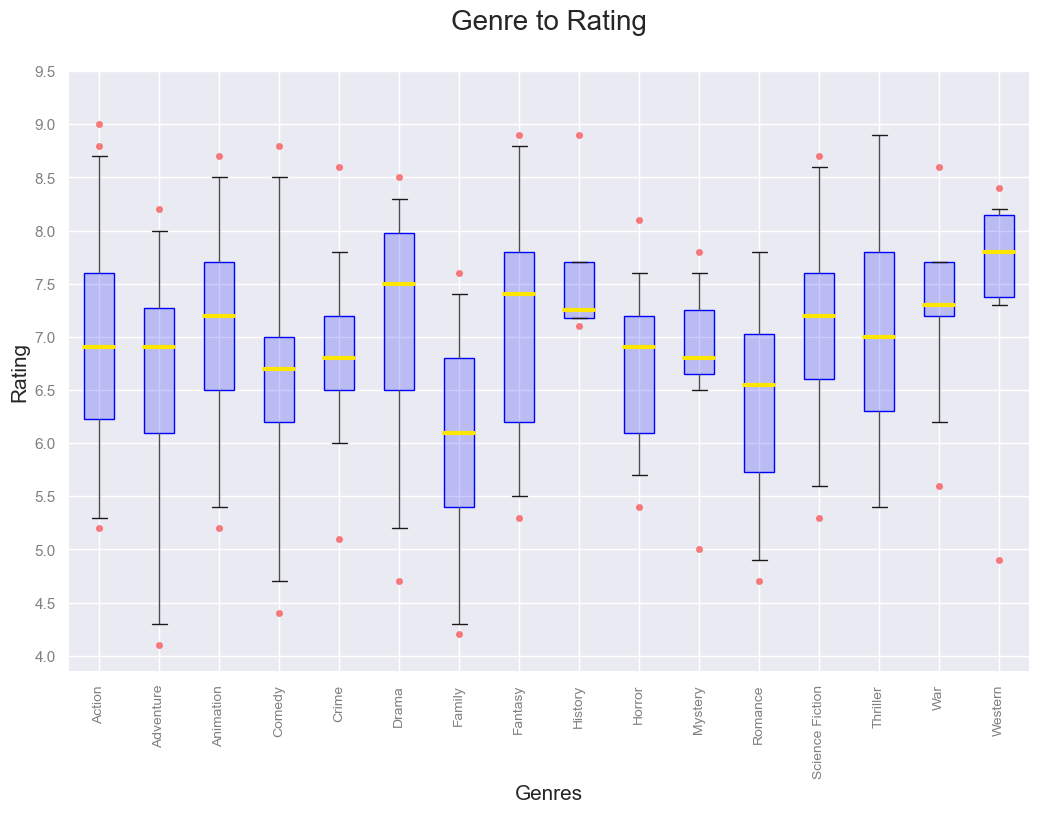

In [285]:
# Plot 2. Box Chart - Genre to Rating

boxprops = dict(color="blue", facecolor=(0, 0, 1, 0.2))
flierprops = dict(
    marker="o", markerfacecolor=(1, 0, 0, 0.5), markeredgecolor="none", markersize=5
)
medianprops = dict(linewidth=3, color=(1, 0.9, 0, 1))
ax = df.boxplot(
    by="genre",
    column=["rating"],
    figsize=(12, 8),
    boxprops=boxprops,
    flierprops=flierprops,
    medianprops=medianprops,
    whis=[1, 99],
    patch_artist=True,
)

fig = ax.get_figure()
fig.suptitle("")
ax.set_yticks(np.arange(4, 10, 0.5))
[ax.spines[spine].set_visible(False) for spine in ["top", "right", "bottom", "left"]]

plt.title("Genre to Rating", fontsize=20, pad=30)
plt.xticks(rotation="vertical", fontsize=10, color="grey")
plt.yticks(color="grey")
plt.ylabel("Rating", fontsize=15)
plt.xlabel("Genres", fontsize=15)

Text(0.5, 0, 'Runtime (bins)')

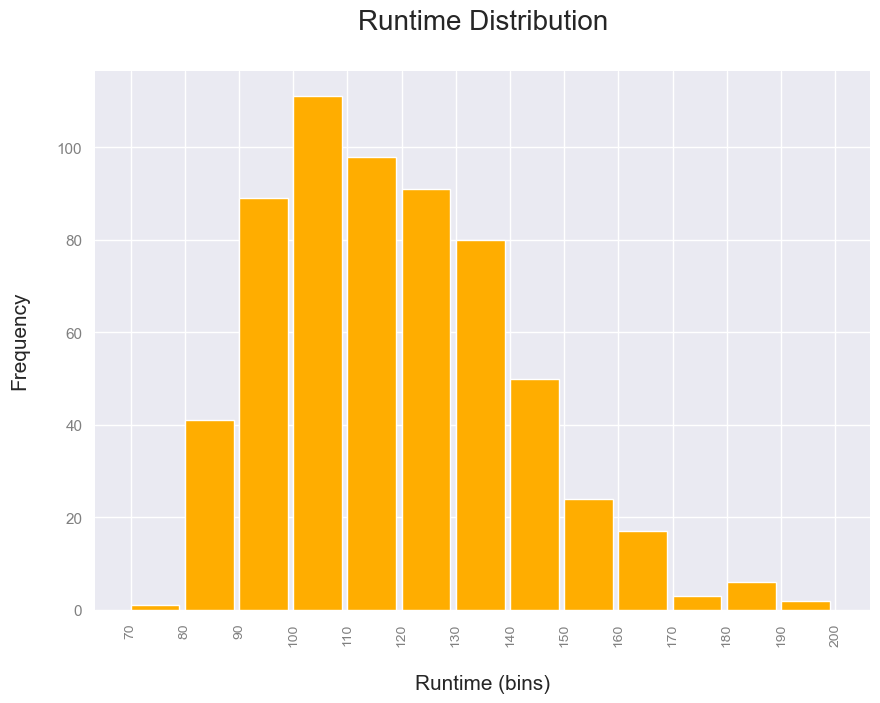

In [286]:
# Plot 3. Histogram - Runtime Distribution

ax = plt.axes()
fig = ax.get_figure()
fig.set_size_inches(10, 7)

hg = df.hist(
    column="runtime", bins=np.arange(70, 210, 10), color=(1, 0.68, 0), width=9, ax=ax
)
[ax.spines[spine].set_visible(False) for spine in ["top", "right", "bottom", "left"]]
ax.set_xticks(np.arange(70, 210, 10))

plt.title("Runtime Distribution", fontsize=20, pad=30)
plt.xticks(rotation="vertical", fontsize=10, color="grey")
plt.yticks(color="grey")
plt.ylabel("Frequency", fontsize=15, labelpad=20)
plt.xlabel("Runtime (bins)", fontsize=15, labelpad=20)

Text(0, 0.5, '')

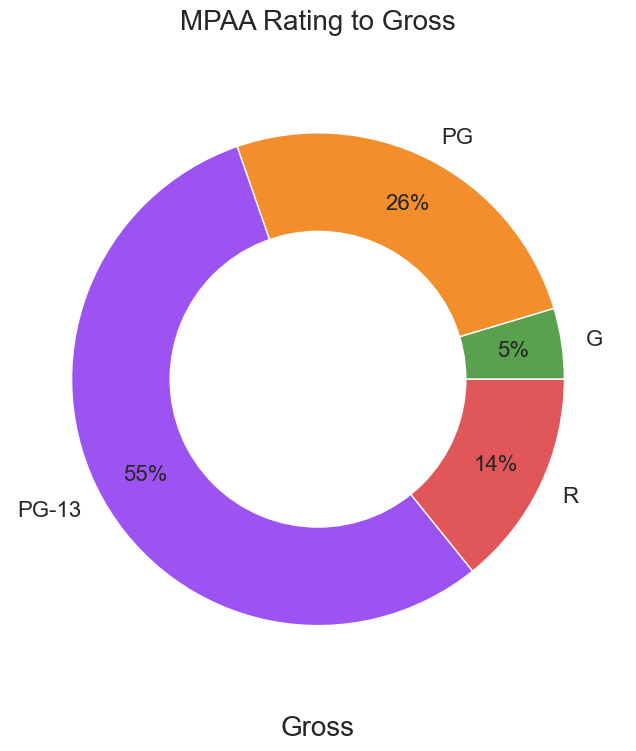

In [287]:
# Plot 4. Pie Chart - MPAA Rating to Gross

colors = ["#59a14f", "#f28e2b", "#9d53f2", "#e15759"]
explode = (0, 0, 0, 0)
textprops = {"fontsize": 16}
pie = (
    df.groupby(["mpaa_rating"])["gross"]
    .sum()
    .plot(
        kind="pie",
        y="gross",
        autopct="%1.0f%%",
        figsize=(8, 8),
        colors=colors,
        explode=explode,
        textprops=textprops,
        labeldistance=1.1,
        pctdistance=0.8,
    )
)
hole = plt.Circle((0, 0), 0.6, facecolor="white")
plt.title("MPAA Rating to Gross", fontsize=20, pad=30)
plt.gcf().gca().add_artist(hole)
plt.xlabel("Gross", fontsize=20, labelpad=20)
plt.ylabel("")

Text(0.5, 0, 'Year of Release Date')

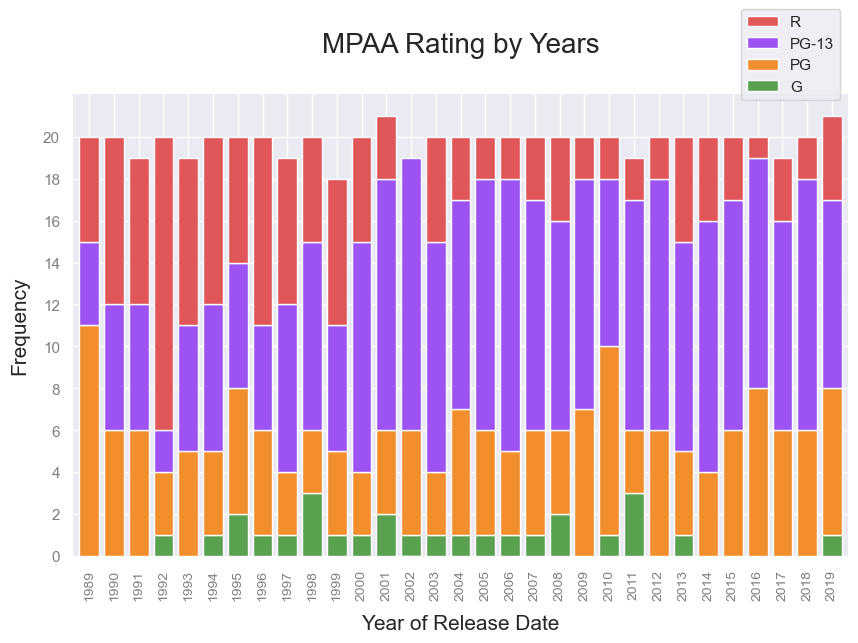

In [288]:
# Plot 5. Stacked Bar Chart - MPAA Rating by Years

colors = ["#59a14f", "#f28e2b", "#9d53f2", "#e15759"]
ax = (
    df.groupby([df["release_date"].dt.year, "mpaa_rating"])["mpaa_rating"]
    .count()
    .unstack()
    .plot(kind="bar", width=0.8, figsize=(10, 6), stacked=True, color=colors)
)

[ax.spines[spine].set_visible(False) for spine in ["top", "right", "bottom", "left"]]
ax.set_yticks(np.arange(0, 22, 2))
handles, labels = ax.get_legend_handles_labels()
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1, 1.2))

plt.title("MPAA Rating by Years", fontsize=20, pad=30)
plt.xticks(rotation="vertical", fontsize=10, color="grey")
plt.yticks(color="grey")
plt.ylabel("Frequency", fontsize=15, labelpad=10)
plt.xlabel("Year of Release Date", fontsize=15, labelpad=10)


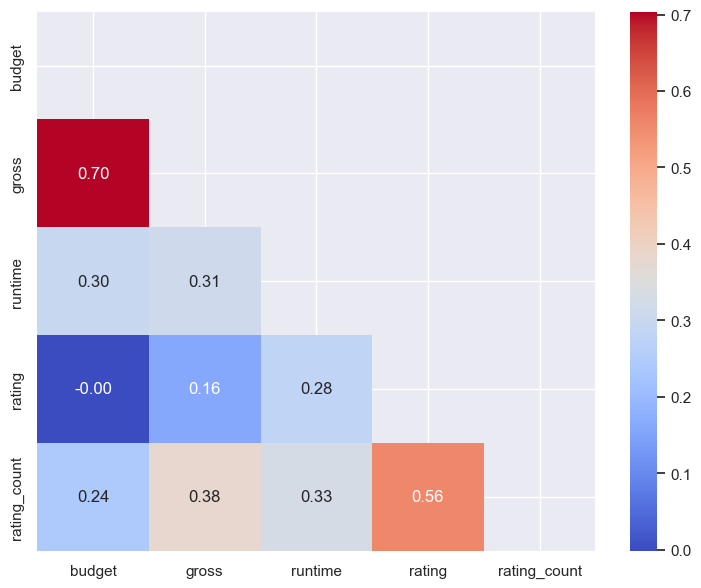

In [289]:
import seaborn as sb

# Plot 6. Heatmap - Correlation Matrix

plt.figure(figsize=(9, 7))
mask = np.triu(np.ones_like(df.corr(numeric_only=True)))
sb.heatmap(
    df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", mask=mask
)
plt.show()

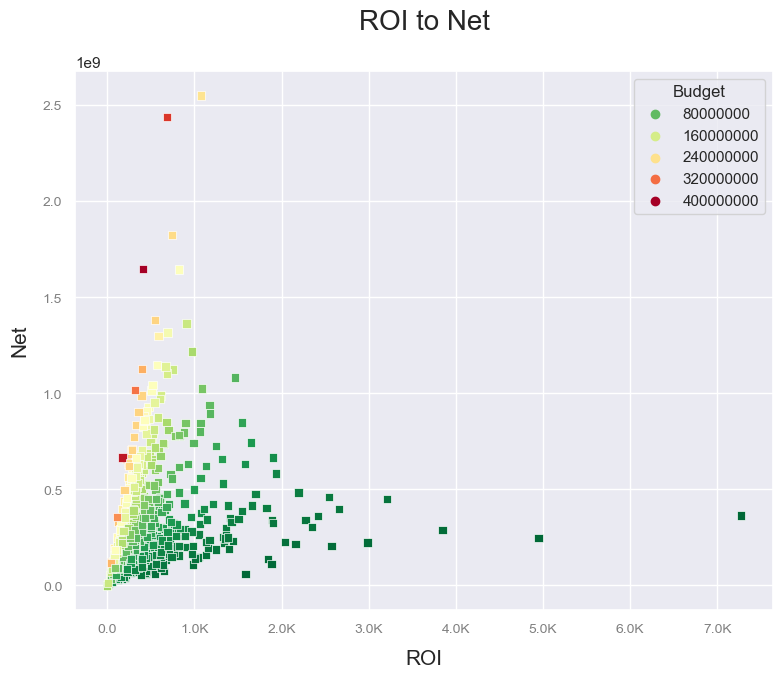

In [325]:
sb.set_theme()
plt.figure(figsize=(9, 7))
df["net"] = (df["gross"] - df["budget"]).astype(np.int64)
df["roi"] = (df["net"] / df["budget"] * 100).astype("int")
pal = sb.color_palette("RdYlGn_r", as_cmap=True)
markers = {"edgewidth": 0, "edgestyle": "off", "edgecolor": ".3"}

ax = plt.axes()
fig = ax.get_figure()

sb.scatterplot(
    data=df,
    x="roi",
    y="net",
    hue="budget",
    palette=pal,
    marker="s",
    markers=markers,
)
sb.axes_style

plt.title("ROI to Net", fontsize=20, pad=30)
plt.xticks(fontsize=10, color="grey")
plt.yticks(fontsize=10, color="grey")
plt.ylabel("Net", fontsize=15, labelpad=10)
plt.xlabel("ROI", fontsize=15, labelpad=10)
plt.legend(title='Budget')


In [295]:
df['budget']

0        7500000
1        7500000
2       13000000
3       14000000
4       15000000
         ...    
610    200000000
611    200000000
612    200000000
613    250000000
614    356000000
Name: budget, Length: 614, dtype: int64